20
[
  "title",      "description",
  "url",        "videoId",
  "seconds",    "timestamp",
  "views",      "genre",
  "uploadDate", "ago",
  "image",      "thumbnail",
  "author",     "meta"
]


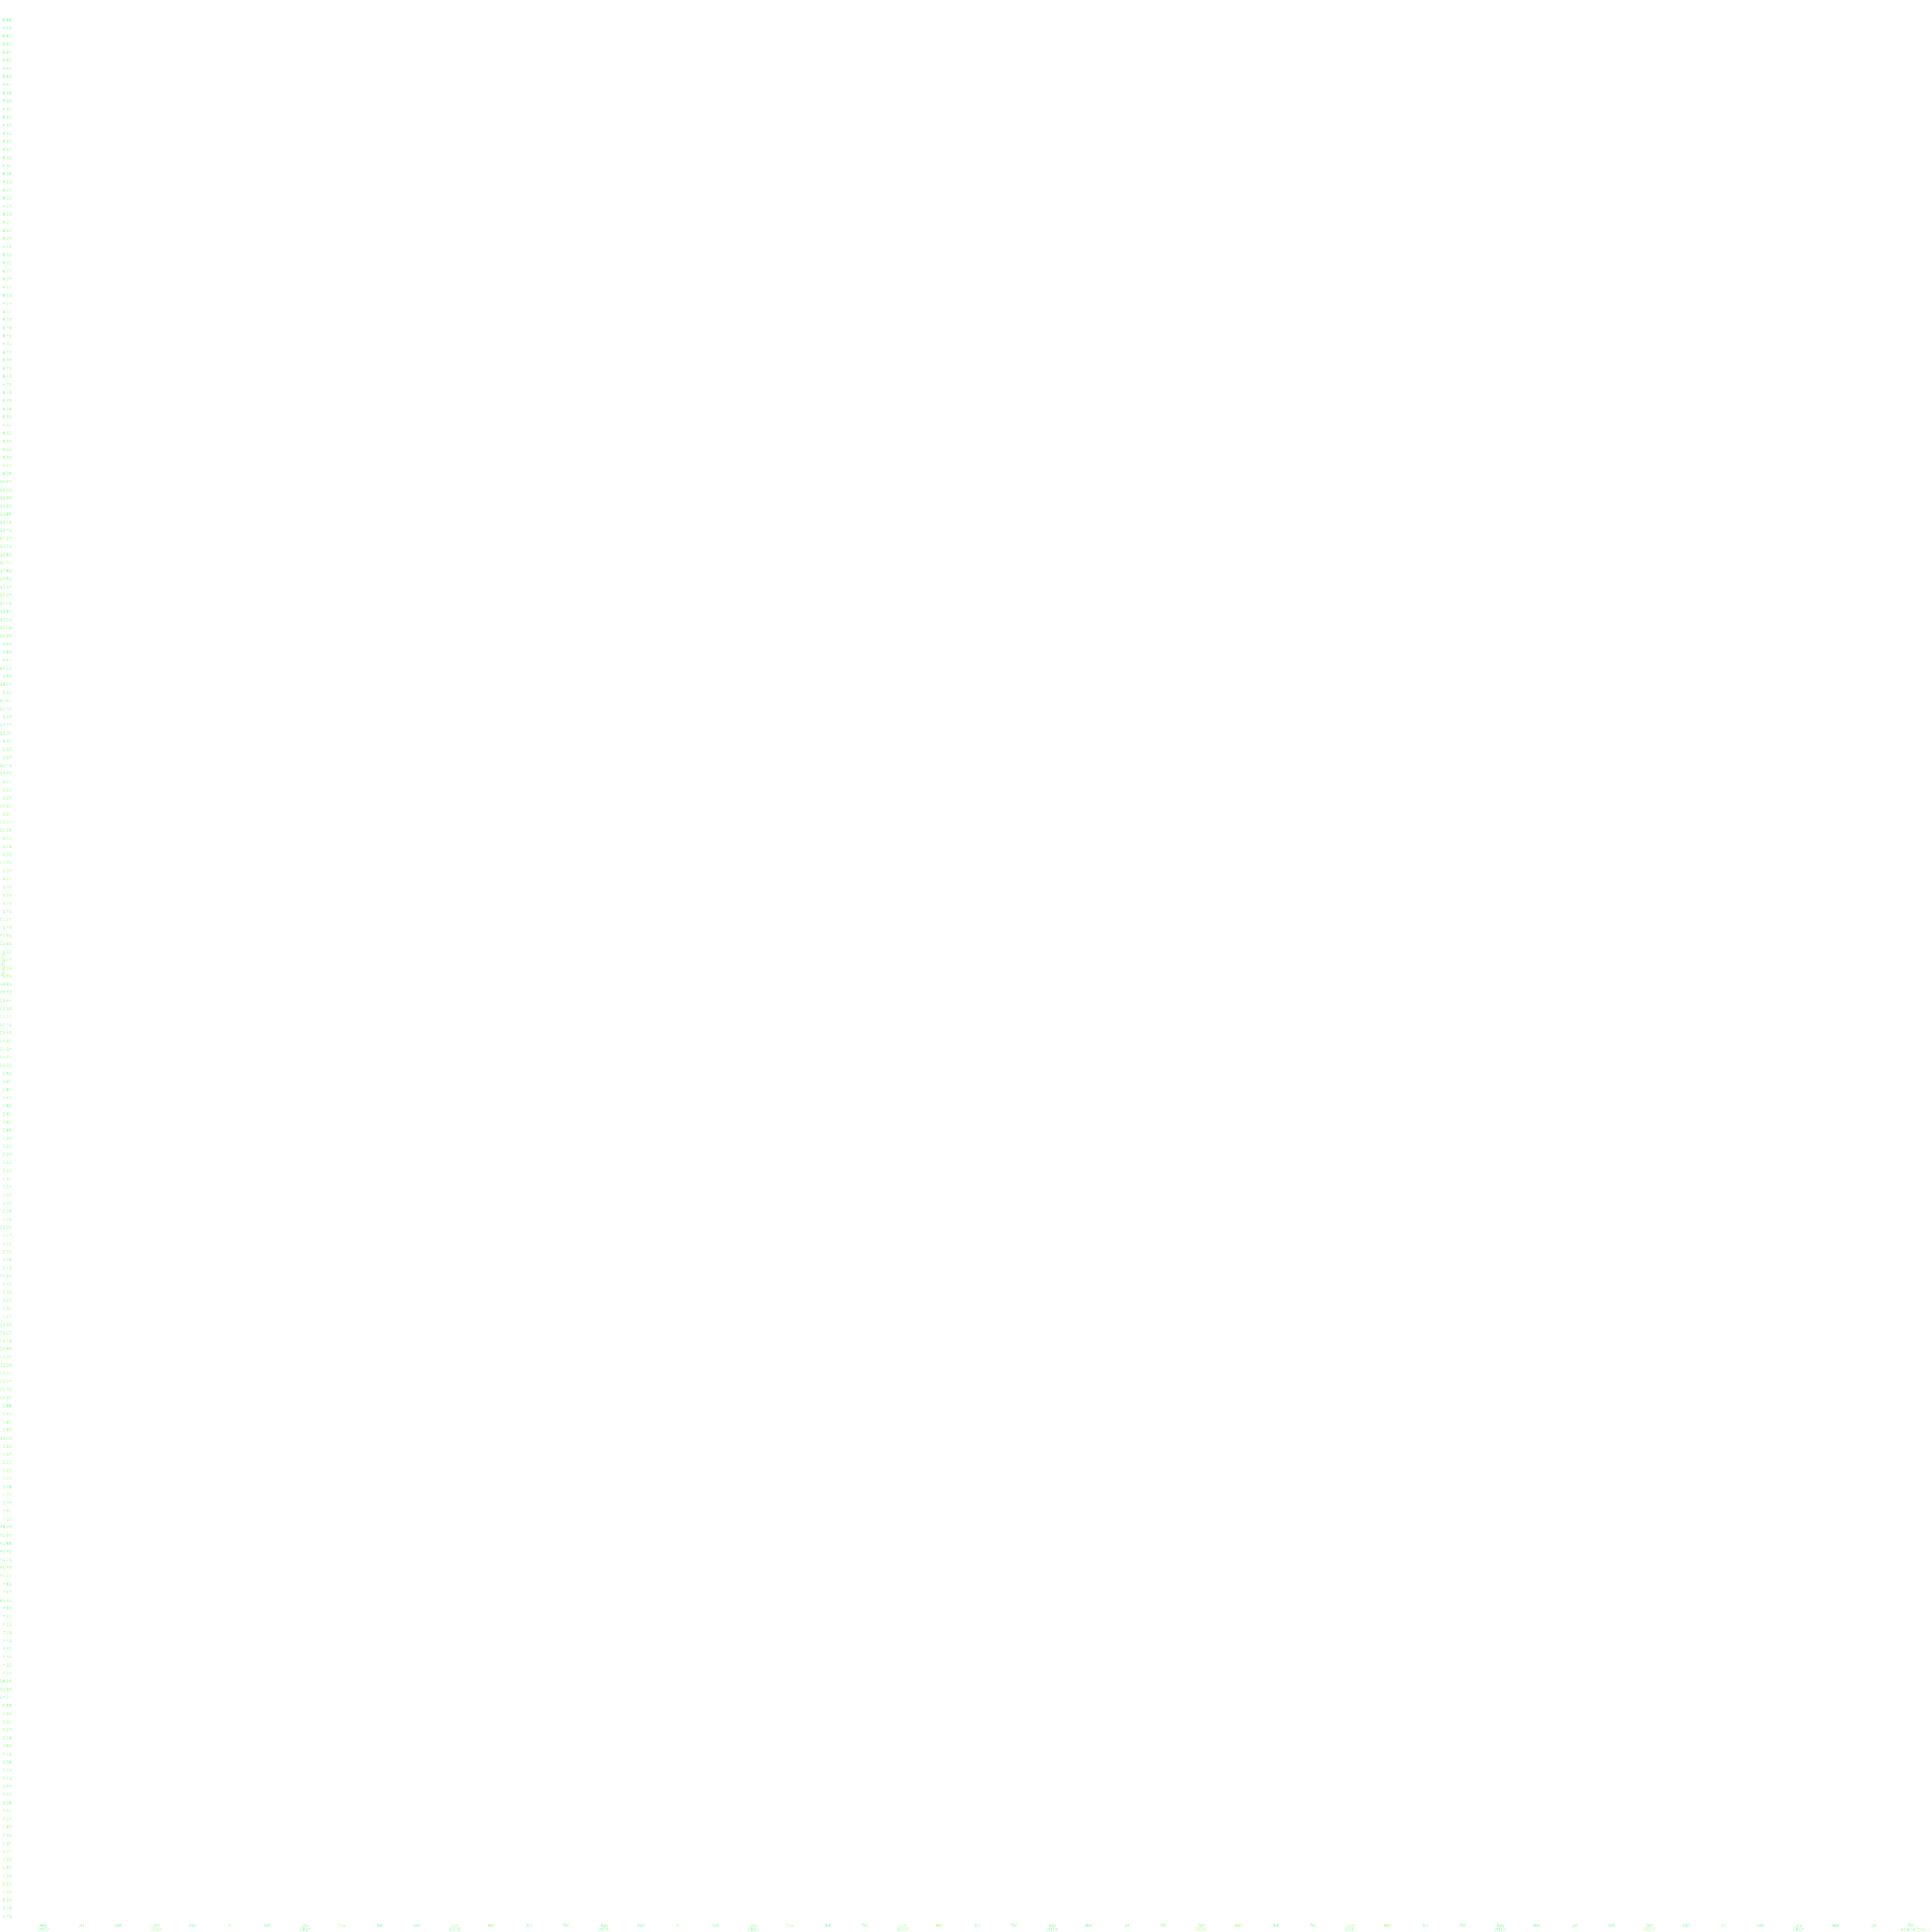

In [1]:
import * as Plot from "npm:@observablehq/plot"
import { document } from "jsr:@ry/jupyter-helper"

const response = await fetch("https://ls.c-e.group/yt/0")
const json = await response.json()
const videos = json.videos.map(v => {
  return {
    ...v,
    uploadDate: new Date(v.uploadDate)  }
})

import yts from "npm:yt-search"
const r = await yts("superman theme")
console.log(r.all.length)

console.log(Object.keys(videos[0]))

const p = Plot.plot({
  width: 5000,
  height: 5000,
  grid: true,
  style: {
    padding: 20,
    color: "white",
    background: 'black',
  },
  marks: [
    Plot.image(videos, {x: "uploadDate", y: "timestamp", src: "thumbnail", width: 200})
  ],
  document
})

/* const encoder = new TextEncoder()
const data = encoder.encode(p.outerHTML)
await Deno.writeFile("ou.svg", data) */

Deno.jupyter.svg`${p.outerHTML}`